In [1]:
# Notebook: Clustering  Analysis based on expression data [including PARP9 gene]
# Description: Notebook contains clusterig analysis of genes expresion for covid-19 and non-covid-19 patients
# Data collected from: GSE157103

In [2]:
%load_ext lab_black

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

from IPython.display import display
import scipy.stats as sts

from src.utils import Utils

In [8]:
deg = pd.read_csv("../Files/DEGs.csv", index_col=0)["0"].values.tolist()
deg

['DTX3L', 'PARP9', 'DDX60', 'AIM2', 'MX1', 'TTC33', 'TRIM22']

In [9]:
# Load expression table

In [10]:
raw_ttable = pd.read_table("../Expression/GSE157103_genes.tpm.tsv", index_col=0).T
raw_ttable

#symbol,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
C1,0.49,0.00,0.21,0.04,0.07,0.0,0.03,18.92,4.07,0.0,...,2.84,4.22,0.95,1.63,15.51,0.06,8.17,363.01,19.17,6.05
C2,0.29,0.00,0.14,0.00,0.00,0.0,0.05,18.68,3.00,0.0,...,3.55,12.15,0.60,1.15,15.62,0.14,8.20,399.80,15.72,4.12
C3,0.26,0.00,0.03,0.02,0.00,0.0,0.07,13.85,1.83,0.0,...,1.34,2.79,0.18,0.32,17.67,0.28,3.62,430.35,13.95,1.81
C4,0.45,0.01,0.09,0.07,0.00,0.0,0.00,22.11,4.22,0.0,...,3.71,5.87,1.40,2.21,15.61,0.27,7.88,209.25,14.78,7.15
C5,0.17,0.00,0.00,0.05,0.07,0.0,0.00,8.45,1.17,0.0,...,1.44,4.46,0.28,0.55,9.34,0.07,5.96,272.91,8.69,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NC22,0.30,0.00,0.02,0.02,0.00,0.0,0.00,17.06,1.96,0.0,...,0.26,1.01,0.13,0.46,5.93,0.24,1.58,447.14,3.04,1.00
NC23,0.70,0.00,0.02,0.01,0.00,0.0,0.00,20.31,1.54,0.0,...,0.64,0.83,0.18,0.73,8.75,0.12,1.57,748.55,4.55,1.56
NC24,0.75,0.00,0.27,0.00,0.06,0.0,0.00,27.25,3.42,0.0,...,1.18,2.14,0.41,1.29,14.93,0.14,5.05,437.62,10.34,3.99
NC25,2.80,0.00,0.04,0.00,0.00,0.0,0.00,21.64,1.43,0.0,...,0.42,0.61,0.19,0.45,4.77,0.33,1.07,369.66,1.83,0.96


In [11]:
ttable = raw_ttable[deg]

genes_set = set(ttable.columns)  # Update genes
print("Updated number of genes: ", len(genes_set))
ttable

Updated number of genes:  7


#symbol,DTX3L,PARP9,DDX60,AIM2,MX1,TTC33,TRIM22
C1,145.23,402.93,115.76,102.60,968.53,6.41,878.28
C2,39.90,112.39,15.15,36.29,53.01,5.82,236.38
C3,122.19,431.47,105.36,157.94,861.15,3.44,802.34
C4,40.19,100.88,13.57,16.85,101.72,6.32,224.91
C5,95.64,398.58,43.04,279.70,59.63,5.72,1086.22
...,...,...,...,...,...,...,...
NC22,7.99,13.07,1.07,5.84,11.96,1.06,24.43
NC23,23.73,82.05,9.00,61.93,117.19,1.36,134.13
NC24,24.23,62.55,5.33,15.15,48.53,3.78,86.22
NC25,14.29,15.18,2.72,4.67,101.83,0.86,35.02


In [13]:
# Load clinical
clinical = pd.read_excel(
    "../data/additional/13148_2021_1102_MOESM1_ESM.xlsx", skiprows=1, index_col=1
)  # Load clinical
clinical

,Sample ID,Covid (1=yes),Diagnosis,ICU (1=yes),Sex,Age,Ethnicity,BMI,WHO ordinal at day 28,Charlson,...,Rheumatic disease,PUD,Liver disese,DM,Hemiplegia,Renal disease,Cancer (solid),HIV/AIDS,Leukemia/lymphoma,Smoking 1=y (current or former);0=never;?=unknown
Albany_sampleID,,,,,,,,,,,,,,,,,,,,,
C1,COVID_01,1,COVID-19,0,M,39,W,31.60,8,0,...,0,0,0,0,0,0,0,0,0,0
C2,COVID_02,1,COVID-19,0,M,63,H,28.70,0,2,...,0,0,0,0,0,0,0,0,0,1
C3,COVID_03,1,COVID-19,0,M,33,W,29.41,3,2,...,0,0,0,1,0,0,0,0,0,0
C4,COVID_04,1,COVID-19,0,M,49,W,27.55,0,1,...,0,0,0,0,0,0,0,0,0,0
C5,COVID_05,1,COVID-19,0,M,49,H,30.40,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NC22,NONCOVID_22,0,pneumonia,0,M,63,AA,25.40,0,2,...,0,0,0,0,0,0,0,0,0,0
NC23,NONCOVID_23,0,pneumonia,0,F,42,W,27.46,0,2,...,0,0,0,0,0,1,0,0,0,0
NC24,NONCOVID_24,0,pneumonia,0,F,32,W,18.50,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
prepared_set = pd.concat((clinical[["Covid (1=yes)"]], ttable), axis=1)

In [43]:
prepared_set = prepared_set.dropna()
prepared_set

,Covid (1=yes),DTX3L,PARP9,DDX60,AIM2,MX1,TTC33,TRIM22
C1,1,145.23,402.93,115.76,102.60,968.53,6.41,878.28
C2,1,39.90,112.39,15.15,36.29,53.01,5.82,236.38
C3,1,122.19,431.47,105.36,157.94,861.15,3.44,802.34
C4,1,40.19,100.88,13.57,16.85,101.72,6.32,224.91
C5,1,95.64,398.58,43.04,279.70,59.63,5.72,1086.22
...,...,...,...,...,...,...,...,...
NC22,0,7.99,13.07,1.07,5.84,11.96,1.06,24.43
NC23,0,23.73,82.05,9.00,61.93,117.19,1.36,134.13
NC24,0,24.23,62.55,5.33,15.15,48.53,3.78,86.22
NC25,0,14.29,15.18,2.72,4.67,101.83,0.86,35.02


<Figure size 936x936 with 0 Axes>

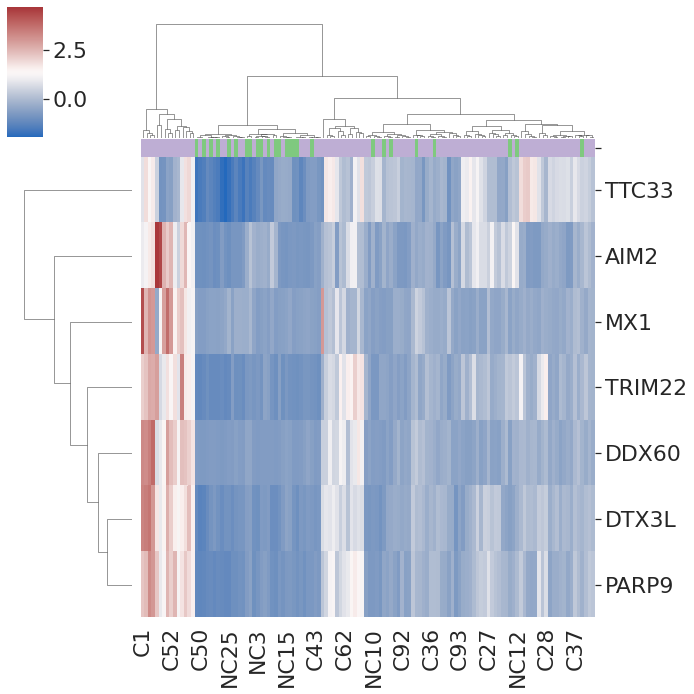

In [44]:
pal = sns.color_palette("Accent", prepared_set["Covid (1=yes)"].nunique())
lut = dict(zip(prepared_set["Covid (1=yes)"].unique()[::-1], pal))
colors = prepared_set["Covid (1=yes)"].map(lut)
colors.name = ""

plt.figure(figsize=(13, 13))
sns.set(font_scale=2)

prepared_set = prepared_set.drop("Covid (1=yes)", axis=1)
df_ttable = StandardScaler().fit_transform(prepared_set).T
df_ttable = pd.DataFrame(
    df_ttable, index=prepared_set.columns, columns=prepared_set.index
)

fig = sns.clustermap(df_ttable, method="ward", col_colors=colors, cmap="vlag")
fig.savefig("../Plots/ClusterMapsExpression/DEG_clustering_STATUS.jpg")
plt.show()

In [45]:
df_ttable = df_ttable.T

In [47]:
# Clusteirng for all samples agains COVID-19 statius

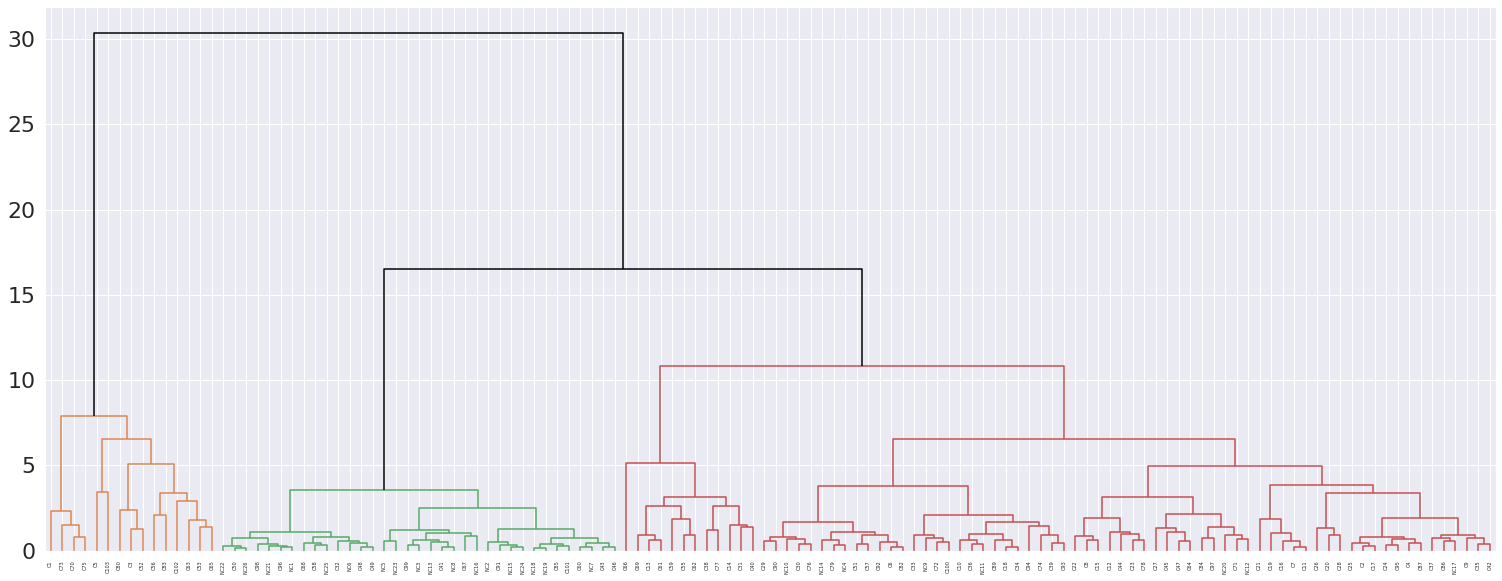

In [48]:
fig = plt.figure(figsize=(26, 10))

Z = linkage(df_ttable, "ward")
dn = dendrogram(
    Z,
    labels=df_ttable.index,
    color_threshold=12,
    above_threshold_color="00000",
    truncate_mode=None,
)

plt.show()

In [49]:
cls_ = fcluster(Z, t=15, criterion="distance")
cls_ = pd.DataFrame(cls_, index=df_ttable.index, columns=["Cluster"])
cls_ = pd.concat((cls_, clinical[["Covid (1=yes)"]]), axis=1).dropna()
cls_

,Cluster,Covid (1=yes)
C1,1.0,1
C2,3.0,1
C3,1.0,1
C4,3.0,1
C5,1.0,1
...,...,...
NC22,2.0,0
NC23,2.0,0
NC24,2.0,0
NC25,2.0,0


In [50]:
cross_table = pd.crosstab(cls_["Cluster"], cls_["Covid (1=yes)"], margins=True)
cross_table

Covid (1=yes),0,1,All
Cluster,,,
1.0,0,15,15
2.0,18,17,35
3.0,8,68,76
All,26,100,126


In [51]:
_, pval, _, _ = sts.chi2_contingency(
    pd.crosstab(cls_["Cluster"], cls_["Covid (1=yes)"])
)
pval

5.282049970941554e-07

In [52]:
cross_table.to_csv("../Plots/ClusterMapsExpression/crsTable_ICU.csv")

In [53]:
# Clustering only for COVID-19 patients only

In [54]:
df_ttable = df_ttable.loc[[name for name in df_ttable.index if name.startswith("C")]]
df_ttable.shape

(100, 7)

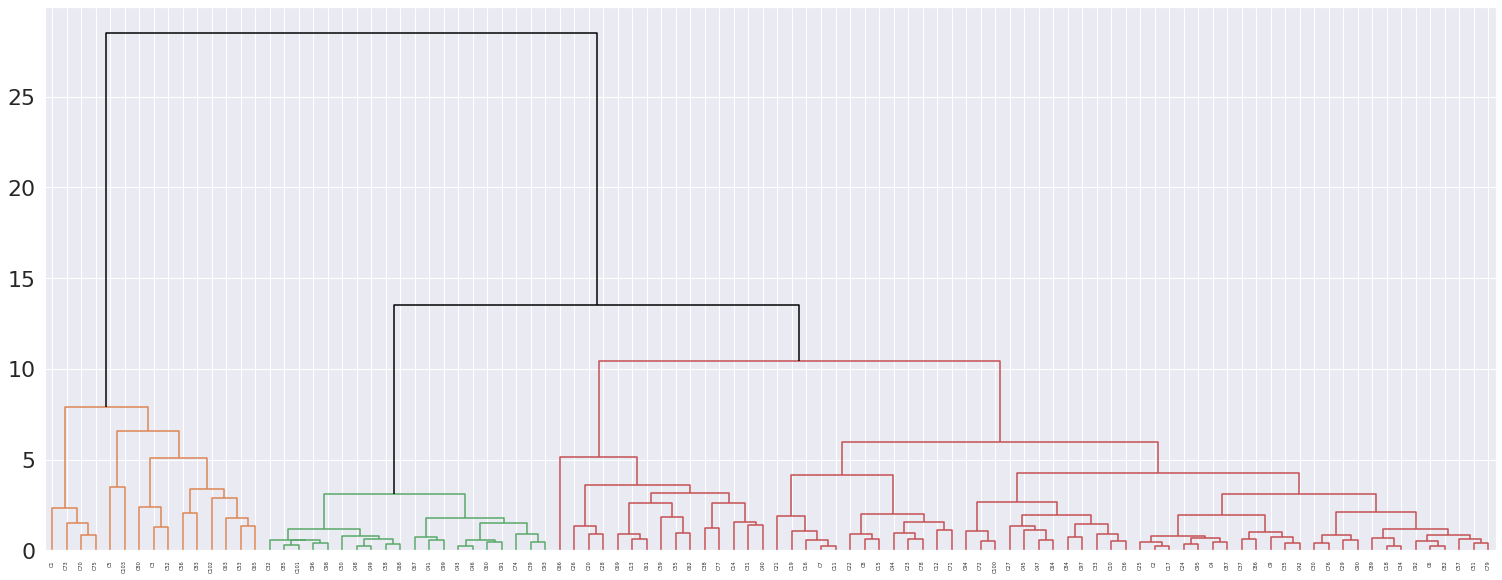

In [55]:
fig = plt.figure(figsize=(26, 10))

Z = linkage(df_ttable, "ward")
dn = dendrogram(
    Z,
    labels=df_ttable.index,
    color_threshold=12,
    above_threshold_color="00000",
    truncate_mode=None,
)

plt.show()

In [56]:
cls_ = fcluster(Z, t=12, criterion="distance")
cls_ = pd.DataFrame(cls_, index=df_ttable.index, columns=["Cluster"])
cls_ = pd.concat((cls_, clinical[["ICU (1=yes)"]]), axis=1).dropna()
cls_

,Cluster,ICU (1=yes)
C1,1.0,0
C2,3.0,0
C3,1.0,0
C4,3.0,0
C5,1.0,0
...,...,...
C99,2.0,1
C100,3.0,0
C101,2.0,1
C102,1.0,0


In [57]:
cross_table = pd.crosstab(cls_["Cluster"], cls_["ICU (1=yes)"], margins=True)
cross_table

ICU (1=yes),0,1,All
Cluster,,,
1.0,13,2,15
2.0,5,15,20
3.0,32,33,65
All,50,50,100


In [58]:
_, pval, _, _ = sts.chi2_contingency(pd.crosstab(cls_["Cluster"], cls_["ICU (1=yes)"]))
pval

0.0014430077318524671